In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams["figure.figsize"] = [10,10]

### Molecular weight of raw materials fed to the shaft furnace

In [2]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams
mol_weight_cao=56.077#in grams
mol_weight_mgo=40.3044 #in grams
mol_weight_al2o3=101.9613 #in grams

In [3]:
h2_prod_yr=200000000 #in kg per year 

In [4]:
# Plant is operational 95% of the time in an year 
operating_hours=365*24*0.95 

In [5]:
h2_prod_hr=h2_prod_yr/operating_hours

![title](reactor_config.jpg)


## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

Iron ore is reducd by hydrogen at a temperature of 800-900 C in an endothermic reaction using 99.5 kJ/mol.<br />
$Fe_{2}O_{3}+ 3H_{2}---> 2Fe + 3H_{2}O$



In [6]:
# to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_per_mol=3/2 
# Weight of H2 for producing one mole of Fe in gms
H2_weight=(H2_per_mol)*mol_weight_H2 
# Number of moles in 1 ton of Fe
mol_per_ton_fe=(1000000)/mol_weight_fe
# Weight of hydrogen in kg to reduce 1 ton of Fe2O3
h2_per_ton_steel=(H2_weight*mol_per_ton_fe)/1000 

print("Hydrogen required to produce 1 ton of iron in kg/ton of iron:",h2_per_ton_steel)

Hydrogen required to produce 1 ton of iron in kg/ton of iron: 54.146655922643035


### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)
 Actual amount of hydrogen entering the shaft furnace is higher than the stoichiometric value.The ration between the actual value and the stoichiometric value is defined as lambda_h2 in these calculations. The graph below shows the variation of mass flow rate of hydrogen with lamda_h2.

In [7]:
#Excess hydrogen fed in the dri shaft furnace for complete reduction of iron ore 
lambda_h2=1.47

h2_per_ton_actual=(h2_per_ton_steel*lambda_h2) 
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",
h2_per_ton_actual)

Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : 79.59558420628527


In [8]:
### Calculate the amount of steel produced per hour 

steel_prod_hr=h2_prod_hr/h2_per_ton_actual
print(steel_prod_hr)

301.9348961440931


In [9]:
## Steel produced annually
steel_prod_yr=steel_prod_hr*operating_hours
steel_prod_yr_MT=steel_prod_yr/10**6


![title](mass_energy_balance_bubble_column.jpg)

## Reactor specific data 

In [10]:
T_reactor=1200 #in C

conversion_meth=0.90 # for the selected configuration

met_feed_rate=1837 #mol/sec

#Multiplied by the molecular weight of methane
met_feed_rate_kg=met_feed_rate*0.016 


met_feed_rate_kg_hr=met_feed_rate_kg*3600 
met_feed_tls=met_feed_rate_kg_hr/steel_prod_hr

#Reactor diameter
dia_reac=5.21


len_reac=8.66

ratio=len_reac/dia_reac
vol_reac=(3.14*dia_reac*dia_reac*len_reac)/4


p_reac_bot=19.1
p_reac_top=15.3

gas_holdup_bot=0.22
gas_holdup_top=0.32
gas_holdup_avg=0.294

v_metal=vol_reac*(1-gas_holdup_avg)



### Carbon produced during the pyrolysis

In [11]:
carbon_prod_yr=3*h2_prod_yr # in kg/year
carbon_prod_yr_MT=carbon_prod_yr/10**6 #in kt/annum

In [12]:
carbon_prod_hr=carbon_prod_yr/operating_hours
carbon_prod_hr

72098.05335255948

### Enthalpy of carbon 
https://webbook.nist.gov/cgi/cbook.cgi?ID=C7440440&Type=JANAFG&Plot=on
A*t + B*t2/2 + C*t3/3 + D*t4/4 − E/t + F − H

It is assumed that 75% of the energy going out from th carbon stream is recovered by passing the incoming natural gas stream through the hot carbon bed. The outlet temperature should not be more than 800 C, otherwise natural gas pyrolysis will start before entering the bubble column reactor.

In [13]:

t=(T_reactor+273)/1000
t_amb=(25+273)/1000

# It is assumed that the carbon deposited at the top of the molten metal is at the same temperature as the reactor 
def carbon_enthalpy(temp):
    A=21.17510
    B=-0.812428
    C=0.448537
    D=-0.043256
    E=-0.013103
    F=710.3470
    G=183.8734
    H=716.6690
#Enthalpy is given in kJ/mol by the shomate equation
    H_carbon=(A*(temp) + (B*temp**2)/2+ (C*temp**3)/3) + ((D*temp**4)/4)-(E/temp)+ F-H
    return H_carbon
H_carbon_si_perkg=(carbon_enthalpy(t)/0.012)
H_carbon_total_KWh=(H_carbon_si_perkg*carbon_prod_hr)/3600
# calculate based on 1 ton of liquid steel 
H_carbon_tls=H_carbon_total_KWh/steel_prod_hr #in KWh



### Enthalpy of hydrogen exiting the reactor 
H° − H°298.15= A*t + B*t2/2 + C*t3/3 + D*t4/4 − E/t + F − H
source : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1333740&Mask=1&Type=JANAFG&Plot=on

In [14]:
A_h=18.563083
B_h=12.257357
C_h=-2.859786
D_h=0.268238
E_h=1.977990
F_h=-1.147438
G_h=156.288133
H_h=0

H_hydrogen=A_h*(t) + (B_h*t**2)/2+ (C_h*t**3)/3 + ((D_h*t**4)/4)-(E_h/t)+ F_h-H_h
H_hydrogen_si_perkg=H_hydrogen/0.002
H_hydrogen_total= ((H_hydrogen_si_perkg*h2_prod_hr)/3600)

H_hydrogen_total

118226.74078271748

### Energy required to heat methane 

Source : https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Units=SI&Mask=1&Type=JANAFG&Plot=on


In [15]:
A_m=85.81217
B_m=11.26467
C_m=-2.114146
D_m=0.138190
E_m=-26.42221
F_m=-153.5327
G_m=224.4143
H_m=-74.87310

In [16]:
H_methane=((A_m*(t) + (B_m*t**2)/2+ (C_m*t**3)/3) + ((D_m*t**4)/4)-(E_m/t)+ F_m-H_m)
H_methane_si_perkg=(H_methane/0.016)
H_methane_total=((H_methane_si_perkg*met_feed_rate_kg_hr)/3600)

### Reaction enthalpy calculation
CH<sub>4</sub>---->>  C+2H<sub>2</sub>

In [17]:
H_reac=74.5 #kj/mole
H_reac_kg=H_reac/0.016

In [18]:
H_reac_total=((met_feed_rate_kg_hr*H_reac_kg*conversion_meth)/3600)
H_reac_total

123170.85

### Energy required per hour in BC reactor

In [19]:
  # 75% of the outgoing energy from the carbon stream is recovered, 
    # so only 25 % of the outgoing energy
    # needs to be supplied.
H_total_per_hr=(H_reac_total+H_methane_total+H_hydrogen_total+(H_carbon_total_KWh)*0.25)
H_total_per_hr_MWh=(H_total_per_hr/1000)
H_total_per_hr_MWh

390.85158768805695

### Total energy requirement per ton of steel in BC reactor

In [20]:
H_reac_tls=H_total_per_hr_MWh/steel_prod_hr

In [21]:
H_reac_tls

1.294489615739977

In [22]:
"""ng_cal=42000 # Kj/kg
extra_ng_required_hr=((H_total_per_hr*3600)/ng_cal)
extra_ng_required_tls=extra_ng_required_hr/steel_prod_hr"""

'ng_cal=42000 # Kj/kg\nextra_ng_required_hr=((H_total_per_hr*3600)/ng_cal)\nextra_ng_required_tls=extra_ng_required_hr/steel_prod_hr'

In [23]:
#print(extra_ng_required_hr)
#print(extra_ng_required_tls)# in kg/tls

In [24]:
total_ng_req_tls_MMBTU=(met_feed_tls/20)

In [25]:
total_ng_req_tls_MMBTU

17.522187953641414

## Liquid tin thermophysical property calculation

#### Reference : https://link.springer.com/content/pdf/10.1134/S0036029518020143.pdf

In [26]:
T1=505
#Calculation of delta h in j/mol

h1=-5855.135+15.961*T1+((18.8702/1000)*T1*T1)-(6.2472334*10**-6*T1*T1*T1)-(123920/T1) 

h1_j_g=h1/118.07

T2=800

h2=9496.31+8.2590486*T2+((16.814429/1000)*T2*T2)-(5.24626*10**-6*(1/T2**3))-(2162488/T2)

T3=1200

h3=-1285.372+28.4512*T3

H=h3
H_kj=H/1000 # in kJ/mol
H_kj_g=(H_kj)/118.07
H_kj_kg=H_kj_g*1000

print(H, H_kj,H_kj_kg)

#### Heat required for heating tin inside the bubble column reactor from 298 K to T_final

T_final=T_reactor
# Converting kj/mol with the molecular weight of tin
# Converting the weight to get kJ/kg
H_tin=((-1285.372+28.4512*T_final)/118.07)
print(H_tin)



32856.068 32.856068 278.2761751503346
278.27617515033455


### Density variation of liquid tin with changing temperature

Reference : https://sci-hub.se/https://doi.org/10.1063/1.3467496

In [27]:
c3=6979 #kg/m3
c4=0.652 
t_ref=505.08
rho_final=(c3-c4*(T_final-t_ref))

### Calculation of weight of liquid tin 

In [28]:
weight_tin=(rho_final*v_metal)

### Capital cost of the metal
Source : http://www.metalary.com/tin-price/

In [29]:
weight_perkg=14918.53/1000 # Converted to Euros 
tin_cost=(weight_tin*weight_perkg)
#Cost of tin in million Euros
million=10**6
tin_cost_million=tin_cost/million
print("Cost of tin in million Euros",tin_cost_million)

Cost of tin in million Euros 12.68337847747413


## Heat required to raise the temperature of tin to 1200 C/1473 K
This energy is not cyclic requirement, as the molten steel does not change its state. 

In [30]:
Heat_tin=(H_tin*weight_tin)

## Total energy consumption of HDRI-EAF system

In [31]:
dri_elec=284.0006036823013 #KWh
EL4=445.3464
el_heat_reac=1.4337274146203023
E_total=((H_reac_tls*1000)+EL4 +dri_elec)
E_total_MWh=E_total/1000

In [32]:
print("Amount of energy required per ton of steel",E_total_MWh)

Amount of energy required per ton of steel 2.023836619422278


In [33]:
E_total_MWH_yr=E_total_MWh*steel_prod_yr #in MWh


In [34]:
Elec_per_yr=(EL4/1000)*steel_prod_yr #in MWh



In [35]:
print(E_total_MWH_yr,Elec_per_yr)

5085298.737621341 1119022.881585517


## CO2 emission
The emissions are generated by burning methane in the gas fired heater and by using electricity from the grid. 

In [36]:
methane_ems=2.75 # amount of CO2 released by burning 1 kg of CH4
extra_ng_required_tls=0
reac_CO2=extra_ng_required_tls*methane_ems #kg/tls
extra_ng_required_tls


0

In [37]:
#print(reac_CO2)

Institute for Global Environmental Strategies (2020). List of Grid Emission Factors, version 10.8. Available at: https://pub.iges.or.jp/pub/iges-list-grid-emission-factors
All copyrights are reserved. The source must be clearly stated when this database is reproduced or transmitted in any form or by any means.

Value for Germany taken from : https://www.carbonfootprint.com/docs/2018_8_electricity_factors_august_2018_-_online_sources.pdf

In [40]:
grid_ef=0.445 #kgCo2/KWh
grid_emission_factor=np.repeat(grid_ef,25).tolist()

In [41]:
EAF_emission_chemical_rkn=58 # 0.058 TCO2/TLS
EAF_emission=[]
for i in range(len(grid_emission_factor)):
    EAF_emission.append(EL4*grid_emission_factor[i] + (EAF_emission_chemical_rkn))

In [42]:
system_emission=[]
for i in range(len(EAF_emission)):
    system_emission.append((reac_CO2+EAF_emission[i])/1000+(E_total_MWh*grid_emission_factor[i]))

In [43]:
print("Emission generated from a Methane pyrolysis based HDRI-EAF plant for steel production has an emission intensity of ",system_emission,"kgCO2/tls")

Emission generated from a Methane pyrolysis based HDRI-EAF plant for steel production has an emission intensity of  [1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138, 1.1567864436429138] kgCO2/tls


In [44]:
annual_emission_mtco2=[]
for i in range(len(system_emission)):
    annual_emission_mtco2.append((system_emission[i]*steel_prod_yr)/10**6)
steel_prod_yr

2512702.2057111426

## Economic analysis     

The costs of the proposed system are evaluated separately as capital costs and operational costs. The capital costs include the cost of the major equipment used for steel production using hydrogen direct reduction of iron ore. Operational costs include the cost of raw materials used for running the plant. Energy resources like natural gas and electricity are also accounted in the operational cost. Some assumptions regarding the lifetime of the plant and equipment, their salvage value are made to conduct a discounted cash flow analysis. Revenue is generated by selling steel and carbon produced by the system. Reduced carbon emissions are accounted as revenue as well. 

In [45]:
# It is assumed that the life of the plant is 25 years
plant_life=25

## Sensitivity analysis parameters

In [46]:
"""carbon_price=np.repeat(100,plant_life) 
ng_price=np.repeat(3,plant_life) #USD/MMBTU
iron_ore_cost=np.repeat(90,plant_life) #usd/ton
electricity_cost=np.repeat(94.15,plant_life) #USD/MWh
emission_cost=np.repeat(50,plant_life) # USD 30 per ton 
carbon_steel_price=np.repeat(700,plant_life)
tax_rate=0.35"""

'carbon_price=np.repeat(100,plant_life) \nng_price=np.repeat(3,plant_life) #USD/MMBTU\niron_ore_cost=np.repeat(90,plant_life) #usd/ton\nelectricity_cost=np.repeat(94.15,plant_life) #USD/MWh\nemission_cost=np.repeat(50,plant_life) # USD 30 per ton \ncarbon_steel_price=np.repeat(700,plant_life)\ntax_rate=0.35'

### Capital costs 

Includes both the inside battery limit costs (ISBL). Installed cost of equipment is calculated with the lang factor method. A lang factor of 10 is considered
as the plant will be first of its kind to convert the purchased cost of equipment to installed cost of the plant.
Purchased cost of major equipment will be calculated in the next sections.

#### Purchased cost of bubble column reactor
It is considered that BC reactor is made of 45 mm thick carbon steel. The cost ofcarbon steel is assumed to be USD 600 /ton. The reactor is lined with refractory (magnesium oxide) layer of 500 mm and the cost of refractory bricks is 400 USD/ton. Fabrication costs are assumed to be 100 USD/ton. 

In [47]:
"""steel_density=7700 #kg/m3
refractory_density=2970 #kg/m3
steel_cost=500 #USD/ton
refractory_cost=400 #USD/ton
tank_manufacturing=100 #USD/ton
refractory_labour=50 #USD/ton
vol_steel_reactor=(np.pi*((dia_reac/2+0.045)**2-(dia_reac/2)**2)*len_reac)
vol_refractory=(np.pi*((dia_reac/2+0.4)**2-(dia_reac/2)**2)*len_reac)
weight_steel_reactor=((vol_steel_reactor*steel_density)/1000)
weight_refractory=((vol_refractory*refractory_density)/1000)"""

'steel_density=7700 #kg/m3\nrefractory_density=2970 #kg/m3\nsteel_cost=500 #USD/ton\nrefractory_cost=400 #USD/ton\ntank_manufacturing=100 #USD/ton\nrefractory_labour=50 #USD/ton\nvol_steel_reactor=(np.pi*((dia_reac/2+0.045)**2-(dia_reac/2)**2)*len_reac)\nvol_refractory=(np.pi*((dia_reac/2+0.4)**2-(dia_reac/2)**2)*len_reac)\nweight_steel_reactor=((vol_steel_reactor*steel_density)/1000)\nweight_refractory=((vol_refractory*refractory_density)/1000)'

In [48]:
#reactor_cost=((weight_steel_reactor*steel_cost)+(weight_refractory*refractory_cost)+(weight_steel_reactor*100)+(weight_refractory*50))/10**6+(tin_cost_million)

In [49]:
# Cost is calculated in USD Million
#reactor_cost

#### Cost of EAF 
The cost of an Electric arc furnace is related with its capacity. USD 80 /per ton /year.
Value taken from IEA estimates. 
Link : https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf


In [50]:
"""EAF_cost_per_ton_yr=112
# The value includes installation costs 
#https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
EAF_total_cost"""

'EAF_cost_per_ton_yr=112\n# The value includes installation costs \n#https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf\nEAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6\nEAF_total_cost'

#### DRI Cost 
Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

In [51]:
"""DRI_cost_per_ton_yr=275 #USD/ton/per year
# Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
# A reduction in cost is considered as larger plants have smaller costs. (0.6)
# The plant costs include all the costs including ISBL, OSBL, area development etc 
# no Lang factor multiplication is required for such a plant
#https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
#voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
DRI_total_cost"""

'DRI_cost_per_ton_yr=275 #USD/ton/per year\n# Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD\n# A reduction in cost is considered as larger plants have smaller costs. (0.6)\n# The plant costs include all the costs including ISBL, OSBL, area development etc \n# no Lang factor multiplication is required for such a plant\n#https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-\n#voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/\nDRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6\nDRI_total_cost'

#### Pressure swing adsorber 

In [52]:
"""PSA_cost=20 # Million USD """

'PSA_cost=20 # Million USD '

#### Gas fired metal furnace 
https://www.alibaba.com/showroom/gas-melting-furnace.html

In [53]:
"""el_heater_cost=50 #Million USD """

'el_heater_cost=50 #Million USD '

## System capital cost evaluation

In [54]:
"""lang_factor_reac=10"""


'lang_factor_reac=10'

In [55]:
"""total_capital_cost=((reactor_cost+PSA_cost)*lang_factor_reac)+(EAF_total_cost+DRI_total_cost+el_heater_cost)"""

'total_capital_cost=((reactor_cost+PSA_cost)*lang_factor_reac)+(EAF_total_cost+DRI_total_cost+el_heater_cost)'

In [56]:
"""print("The ISBL cost for the system is ",total_capital_cost,"Million USD ")"""

'print("The ISBL cost for the system is ",total_capital_cost,"Million USD ")'

## Operational cost 

The operational costs include the use of raw material and resources, as well as cost of the consumables used in the EAF and DRI. It also includes energy resources used by the plant for production.
Electricity cost reference : https://reinhardbuetikofer.eu/wp-content/uploads/2017/09/Matthes-2017-Memo-Electricity-costs-of-energy-intensive-industries-in-Germany-1.pdf

In [57]:
"""m1=1.599 # mass flow rate of iron ore in t/tls
eaf_op_cost_tls=np.repeat(32,plant_life).tolist() #t/yr of dri
dri_op_cost_tls=np.repeat(13,plant_life).tolist() #t/yr of dri
total_ng_cost=[]
iron_ore_cost_tls=[]
electricity_cost_tls=[]
for i in range(len(eaf_op_cost_tls)):
    total_ng_cost.append(total_ng_req_tls_MMBTU*ng_price[i])
    iron_ore_cost_tls.append(m1*iron_ore_cost[i])
    electricity_cost_tls.append((electricity_cost[i]*E_total_MWh)/1000)
"""


'm1=1.599 # mass flow rate of iron ore in t/tls\neaf_op_cost_tls=np.repeat(32,plant_life).tolist() #t/yr of dri\ndri_op_cost_tls=np.repeat(13,plant_life).tolist() #t/yr of dri\ntotal_ng_cost=[]\niron_ore_cost_tls=[]\nelectricity_cost_tls=[]\nfor i in range(len(eaf_op_cost_tls)):\n    total_ng_cost.append(total_ng_req_tls_MMBTU*ng_price[i])\n    iron_ore_cost_tls.append(m1*iron_ore_cost[i])\n    electricity_cost_tls.append((electricity_cost[i]*E_total_MWh)/1000)\n'

In [58]:
"""operational_cost_annual=[]
for i in range(len(electricity_cost_tls)):
    operational_cost_annual.append((((ng_cost[i]+iron_ore_cost_tls[i]+electricity_cost_tls[i]+eaf_op_cost_tls[i]+dri_op_cost_tls[i])*steel_prod_yr)/10**6))"""

'operational_cost_annual=[]\nfor i in range(len(electricity_cost_tls)):\n    operational_cost_annual.append((((ng_cost[i]+iron_ore_cost_tls[i]+electricity_cost_tls[i]+eaf_op_cost_tls[i]+dri_op_cost_tls[i])*steel_prod_yr)/10**6))'

In [59]:
"""operational_cost_annual_tls=np.repeat(operational_cost_annual,plant_life)"""


'operational_cost_annual_tls=np.repeat(operational_cost_annual,plant_life)'

## Maintenance cost evaluation

As there are very few moving parts in the system, the maintenance cost would not be high and a lower value of 3% of the total capital cost has been assumed per year. 

In [60]:
"""maintenance_cost_percentage=0.10 # 10% of the capital cost"""

'maintenance_cost_percentage=0.10 # 10% of the capital cost'

In [61]:
"""maint_cost_yr=[]
for i in range(len(operational_cost_annual)):
    maint_cost_yr.append((maintenance_cost_percentage*total_capital_cost))
"""

'maint_cost_yr=[]\nfor i in range(len(operational_cost_annual)):\n    maint_cost_yr.append((maintenance_cost_percentage*total_capital_cost))\n'

In [62]:
"""print("Maintenance cost for the plant is :",maint_cost_yr,"Million USD")"""

'print("Maintenance cost for the plant is :",maint_cost_yr,"Million USD")'

## Labour cost evaluation 
A labour cost of 20 USD/tls has been taken for a highly automated plant.

In [63]:
"""labour_cost_tls=40 #USD/tls"""

'labour_cost_tls=40 #USD/tls'

In [64]:
"""labour_cost_yr=np.repeat(((labour_cost_tls*steel_prod_yr)/10**6),plant_life)"""

'labour_cost_yr=np.repeat(((labour_cost_tls*steel_prod_yr)/10**6),plant_life)'

In [65]:
"""print("Labour cost for the plant is :",labour_cost_yr,"Million USD")"""

'print("Labour cost for the plant is :",labour_cost_yr,"Million USD")'

## Emission cost evaluation

In [66]:
"""total_emission_cost=[]
for i in range(len(emission_cost)):
    total_emission_cost.append(annual_emission_mtco2[i]*emission_cost[i]) # in Million USD"""

'total_emission_cost=[]\nfor i in range(len(emission_cost)):\n    total_emission_cost.append(annual_emission_mtco2[i]*emission_cost[i]) # in Million USD'

### Revenue estimation
In order to consider the revenue from stainless steel production cost of alloys needs to be considered.

In [67]:
 # USD/ton

"""revenue_steel=[]
for i in range(len(carbon_steel_price)):
    revenue_steel.append(((carbon_steel_price[i]*steel_prod_yr)/10**6))"""


'revenue_steel=[]\nfor i in range(len(carbon_steel_price)):\n   revenue_steel.append(((carbon_steel_price[i]*steel_prod_yr)/10**6))'

In [68]:
"""#USD/ton
# Assume that 60% of the carbon produced could be sold
carbon_sold=0.6
revenue_carbon=[]
# Revenue generated in Million USD /year 
for i in range(len(carbon_price)):
    revenue_carbon.append((carbon_price[i]*carbon_prod_yr*carbon_sold)/10**9)"""


'#USD/ton\n# Assume that 60% of the carbon produced could be sold\ncarbon_sold=0.6\nrevenue_carbon=[]\n# Revenue generated in Million USD /year \nfor i in range(len(carbon_price)):\n    revenue_carbon.append((carbon_price[i]*carbon_prod_yr*carbon_sold)/10**9)'

In [69]:
"""total_revenue_usd_million=[]
for i in range(len(revenue_carbon)):
    total_revenue_usd_million.append(revenue_steel[i]+revenue_carbon[i])"""

'total_revenue_usd_million=[]\nfor i in range(len(revenue_carbon)):\n    total_revenue_usd_million.append(revenue_steel[i]+revenue_carbon[i])'

## Discounted cash flow analysis


In [70]:
"""years=np.arange(0,plant_life,1)
Years=np.round(years,0).tolist()
production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()
annual_emission=annual_emission_mtco2
for i in range(2):
    production_steel[i]=0
    production_hydrogen[i]=0
    annual_emission[i]=0
 """

'years=np.arange(0,plant_life,1)\nYears=np.round(years,0).tolist()\nproduction_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()\nproduction_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()\nannual_emission=annual_emission_mtco2\nfor i in range(2):\n    production_steel[i]=0\n    production_hydrogen[i]=0\n    annual_emission[i]=0\n '

In [71]:
"""# Converting revenue
revenue=total_revenue_usd_million
revenue_c=revenue_carbon
revenue_s=revenue_steel

revenue_adj=np.round(revenue, 2)
carbon_revenue=np.round(revenue_c, 2)
steel_revenue=np.round(revenue_s, 2)
for i in range(2):
    revenue_c[i]=0
    revenue_s[i]=0
    revenue[i]=0
    carbon_revenue[i]=0
    steel_revenue[i]=0"""

'# Converting revenue\nrevenue=total_revenue_usd_million\nrevenue_c=revenue_carbon\nrevenue_s=revenue_steel\n\nrevenue_adj=np.round(revenue, 2)\ncarbon_revenue=np.round(revenue_c, 2)\nsteel_revenue=np.round(revenue_s, 2)\nfor i in range(2):\n    revenue_c[i]=0\n    revenue_s[i]=0\n    revenue[i]=0\n    carbon_revenue[i]=0\n    steel_revenue[i]=0'

In [72]:
"""capital_cost=np.repeat(0,plant_life).tolist()
capital_cost[0]=total_capital_cost/3
capital_cost[1]=(total_capital_cost)*(2/3)
len(capital_cost)"""

'capital_cost=np.repeat(0,plant_life).tolist()\ncapital_cost[0]=total_capital_cost/3\ncapital_cost[1]=(total_capital_cost)*(2/3)\nlen(capital_cost)'

In [73]:
"""operational_cost=operational_cost_annual
labour_cost=labour_cost_yr
maintenance_cost=maint_cost_yr
emission_cost=total_emission_cost

for i in range(2):
    operational_cost[i]=0
    labour_cost[i]=0
    maintenance_cost[i]=0
    emission_cost[i]=0
    
    """

'operational_cost=operational_cost_annual\nlabour_cost=labour_cost_yr\nmaintenance_cost=maint_cost_yr\nemission_cost=total_emission_cost\n\nfor i in range(2):\n    operational_cost[i]=0\n    labour_cost[i]=0\n    maintenance_cost[i]=0\n    emission_cost[i]=0\n    \n    '

In [74]:
"""depreciation=(total_capital_cost-0)/plant_life"""

'depreciation=(total_capital_cost-0)/plant_life'

In [75]:
"""depreciation_cost=[]
for i in range(len(labour_cost_yr)):
    if(i<2):
        depreciation_cost.append(0)
    else:
        depreciation_cost.append(depreciation)
"""
    

'depreciation_cost=[]\nfor i in range(len(labour_cost_yr)):\n    if(i<2):\n        depreciation_cost.append(0)\n    else:\n        depreciation_cost.append(depreciation)\n'

### Tax calculation

In [76]:
"""tax_cost=[]
for i in range(len(labour_cost_yr)):
    tax_cost.append((revenue[i]-(operational_cost[i]+labour_cost[i]+maintenance_cost[i]+emission_cost[i]+depreciation_cost[i]))*tax_rate)
"""

'tax_cost=[]\nfor i in range(len(labour_cost_yr)):\n    tax_cost.append((revenue[i]-(operational_cost[i]+labour_cost[i]+maintenance_cost[i]+emission_cost[i]+depreciation_cost[i]))*tax_rate)\n'

In [77]:
"""#Empty dataframe
df = pd.DataFrame()"""

'#Empty dataframe\ndf = pd.DataFrame()'

## Sensitivity analysis : Graphs 

In [78]:
def sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price):
    #capital cost
    #reactor cost calculation
    plant_life=25
    m1=1.599 # iron ore feed rate
    #interest_rate=0.10
    #tax_rate=0.35
    steel_density=7700 #kg/m3
    refractory_density=2970 #kg/m3
    steel_cost=500 #USD/ton
    refractory_cost=400 #USD/ton
    tank_manufacturing=100 #USD/ton
    refractory_labour=50 #USD/ton
    vol_steel_reactor=(np.pi*((dia_reac/2+0.045)**2-(dia_reac/2)**2)*len_reac)
    vol_refractory=(np.pi*((dia_reac/2+0.4)**2-(dia_reac/2)**2)*len_reac)
    weight_steel_reactor=((vol_steel_reactor*steel_density)/1000)
    weight_refractory=((vol_refractory*refractory_density)/1000)
    reactor_cost=((weight_steel_reactor*steel_cost)+(weight_refractory*refractory_cost)+(weight_steel_reactor*100)+(weight_refractory*50))/10**6+(tin_cost_million)
    EAF_cost_per_ton_yr=112
    # The value includes installation costs 
    #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
    EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
    #### DRI Cost 
    #Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

    DRI_cost_per_ton_yr=275 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
    # A reduction in cost is considered as larger plants have smaller costs. (0.6)
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
    #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
    DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 

    PSA_cost=5 # Million USD 
   
    

    #### Gas fired metal furnace 
    #https://www.alibaba.com/showroom/gas-melting-furnace.html

    el_heater_cost=50 #Million USD 
    lang_factor_reac=10
    total_capital_cost=((reactor_cost+PSA_cost)*lang_factor_reac)+(EAF_total_cost+DRI_total_cost+ el_heater_cost)
     ##Operational cost
    eaf_op_cost_tls=np.repeat(32,plant_life).tolist() #t/yr of dri
    dri_op_cost_tls=np.repeat(13,plant_life).tolist() #t/yr of dri
    dri_elec=284.0006036823013 #KWh
    EL4=445.3464
    el_heat_reac=1.4337274146203023 #MWh
    el_total=(dri_elec+EL4+(el_heat_reac*1000))/1000
    ng_cost=[]
    iron_ore_cost_tls=[]
    electricity_cost_tls=[]
    for i in range(len(eaf_op_cost_tls)):
        ng_cost.append(total_ng_req_tls_MMBTU*ng_price)
        iron_ore_cost_tls.append(m1*iron_ore_cost)
        electricity_cost_tls.append((electricity_cost*(el_total)))
    operational_cost_annual=[]
    for i in range(len(eaf_op_cost_tls)):
        operational_cost_annual.append((((ng_cost[i]+iron_ore_cost_tls[i]+electricity_cost_tls[i]+eaf_op_cost_tls[i]+dri_op_cost_tls[i])*steel_prod_yr)/10**6))
    
    #Maintenance cost
    maintenance_cost_percentage=0.10 # 10% of the capital cost
    maint_cost_yr=np.repeat((maintenance_cost_percentage*total_capital_cost),plant_life)
    maint_cost_yr= maint_cost_yr.tolist()
    #labour cost
    labour_cost_tls=40 #USD/tls
    labour_cost_yr=np.repeat(((labour_cost_tls*steel_prod_yr)/10**6),plant_life)
    labour_cost_yr=labour_cost_yr.tolist()
    #Emission cost
    total_emission_cost=[]
    for i in range(len(eaf_op_cost_tls)):
        total_emission_cost.append(annual_emission_mtco2[i]*emission_cost) # in Million USD
    depreciation=(total_capital_cost-0)/plant_life
    depreciation_cost=[]
    for i in range(len(eaf_op_cost_tls)):
        if(i<2):
            depreciation_cost.append(0)
        else:
            depreciation_cost.append(depreciation)
    
        # Revenue
    # USD/ton
    revenue_steel=[]
    for i in range(len(eaf_op_cost_tls)):
        revenue_steel.append(((carbon_steel_price*steel_prod_yr)/10**6))
    #USD/ton
    # Assume that 60% of the carbon produced could be sold
    carbon_sold=0.6
    revenue_carbon=[]
    # Revenue generated in Million USD /year 
    for i in range(len(eaf_op_cost_tls)):
        revenue_carbon.append((carbon_price*carbon_prod_yr*carbon_sold)/10**9)
    total_revenue_usd_million=[]
    for i in range(len(eaf_op_cost_tls)):
        total_revenue_usd_million.append(revenue_steel[i]+revenue_carbon[i])
    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()
    annual_emission=annual_emission_mtco2
    for i in range(2):
        production_steel[i]=0
        production_hydrogen[i]=0
        annual_emission[i]=0
    # Converting revenue
    revenue=total_revenue_usd_million
    revenue_c=revenue_carbon
    revenue_s=revenue_steel

    
    for i in range(2):
        revenue_c[i]=0
        revenue_s[i]=0
        revenue[i]=0
    capital_cost=np.repeat(0,plant_life).tolist()
    capital_cost[0]=(total_capital_cost/3)
    capital_cost[1]=(total_capital_cost)*(2/3)
    operational_cost=operational_cost_annual
    labour_cost=labour_cost_yr
    maintenance_cost=maint_cost_yr
    #emission_cost=total_emission_cost

    for i in range(2):
        operational_cost[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        total_emission_cost[i]=0 
    # tax calculation
    tax_cost=[]
    for i in range(len(eaf_op_cost_tls)):
        tax_cost.append((revenue[i]-(operational_cost[i]+labour_cost[i]+maintenance_cost[i]+total_emission_cost[i]+depreciation_cost[i]))*tax_rate)
    cash_flow=[]
    for i in range(len(eaf_op_cost_tls)):
        cash_flow.append(revenue[i]-(capital_cost[i]+operational_cost[i]+labour_cost[i]+maintenance_cost[i]+total_emission_cost[i]+tax_cost[i]))
  
    #return(NPV_methane_pyrolysis,IRR_system)
    return(cash_flow)
    
    

    


   


    

In [111]:
# Base case values
interest_rate=0.10
tax_rate=0.35
carbon_price=200
ng_price=6.58 #USD/MMBTU
iron_ore_cost=90
electricity_cost=56.15
emission_cost=50
carbon_steel_price=650
variation=np.arange(0.95,1.05,0.01).tolist()


In [112]:

"""carbon_price=np.repeat(ca_base_price,plant_life).tolist()
ng_price=np.repeat(ng_base_price,plant_life).tolist() #USD/MMBTU
iron_ore_cost=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton
electricity_cost=np.repeat(electricity_base_price,plant_life).tolist()#USD/MWh
emission_cost=np.repeat(cer_base_price,plant_life).tolist() # USD 30 per ton 
carbon_steel_price=np.repeat(carbon_steel_base_price,plant_life).tolist()"""

'carbon_price=np.repeat(ca_base_price,plant_life).tolist()\nng_price=np.repeat(ng_base_price,plant_life).tolist() #USD/MMBTU\niron_ore_cost=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton\nelectricity_cost=np.repeat(electricity_base_price,plant_life).tolist()#USD/MWh\nemission_cost=np.repeat(cer_base_price,plant_life).tolist() # USD 30 per ton \ncarbon_steel_price=np.repeat(carbon_steel_base_price,plant_life).tolist()'

In [113]:
cash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)

NPV_methane_pyrolysis=np.npv(interest_rate,cash_flow)
IRR_system=np.irr(cash_flow)*100
print(NPV_methane_pyrolysis)
print(IRR_system)

424.40803356302587
14.603321252210243


In [114]:
NPV_base=np.repeat(NPV_methane_pyrolysis,len(variation)).tolist()
IRR_base=np.repeat(IRR_system,len(variation)).tolist()*100
len(variation)

11

In [115]:
NPV_carbon=[]
IRR_carbon=[]
carbon_price_change=[]
for i in range(len(variation)):
    carbon_price_change.append(variation[i]*carbon_price)
for i in range(len(variation)):
    a=carbon_price_change[i]
    #carbon_price_sens=np.repeat(a,25).tolist()
    cash_flow=sensitivity_analysis(interest_rate,tax_rate,a,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)
    NPV_carbon.append(np.npv(interest_rate,cash_flow))
    IRR_carbon.append(np.irr(cash_flow)*100)
    
print(NPV_carbon)


[405.5110052833767, 409.29041093930556, 413.06981659523586, 416.8492222511665, 420.62862790709687, 424.40803356302587, 428.18743921895623, 431.9668448748869, 435.7462505308155, 439.5256561867459, 443.3050618426746]


In [116]:
NPV_emission=[]
IRR_emission=[]
emission_price_change=[]
for i in range(len(variation)):
    emission_price_change.append(variation[i]*emission_cost)
for i in range(len(variation)):
    b=emission_price_change[i]
    #emission_price_sens=np.repeat(a,25).tolist()
    cash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,b,carbon_steel_price)
    NPV_emission.append(np.npv(interest_rate,cash_flow))
    IRR_emission.append(np.irr(cash_flow)*100)
print(NPV_emission)

[462.55194561581504, 454.92316320525737, 447.29438079469946, 439.66559838414156, 432.03681597358366, 424.40803356302587, 416.77925115246774, 409.15046874190995, 401.52168633135204, 393.8929039207959, 386.2641215102361]


In [117]:
NPV_natural_gas=[]
IRR_ng=[]
ng_price_change=[]
for i in range(len(variation)):
    ng_price_change.append(variation[i]*ng_price)
for i in range(len(variation)):
    d=ng_price_change[i]
    #ng_price_sens=np.repeat(a,25).tolist()
    cash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,d,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)
    IRR_system=np.irr(cash_flow)
    NPV_natural_gas.append(np.npv(interest_rate,cash_flow))
    IRR_ng.append(np.irr(cash_flow)*100)
print(NPV_natural_gas)

[500.4435089727729, 485.2364138908246, 470.02931880887434, 454.8222237269244, 439.6151286449759, 424.40803356302587, 409.20093848107547, 393.99384339912706, 378.786748317177, 363.57965323522683, 348.37255815327825]


In [118]:
NPV_electricity=[]
IRR_electricity=[]
elec_price_change=[]
for i in range(len(variation)):
    elec_price_change.append(variation[i]*electricity_cost)
for i in range(len(variation)):
    e=elec_price_change[i]
    print(e)
    #elec_price_sens=np.repeat(a,25).tolist()
    cash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,e,emission_cost,carbon_steel_price)
    NPV_electricity.append(np.npv(interest_rate,cash_flow))
    IRR_electricity.append(np.irr(cash_flow)*100)
print(NPV_electricity)

53.342499999999994
53.903999999999996
54.4655
55.027
55.588499999999996
56.15
56.7115
57.272999999999996
57.8345
58.396
58.9575
[504.5063262865756, 488.4866677418645, 472.4670091971534, 456.44735065244413, 440.4276921077349, 424.40803356302587, 408.3883750183164, 392.36871647360533, 376.3490579288961, 360.3293993841868, 344.3097408394759]


In [119]:
NPV_ironore=[]
IRR_ironore=[]
ironore_price_change=[]
for i in range(len(variation)):
    ironore_price_change.append(variation[i]*iron_ore_cost)
for i in range(len(variation)):
    f=ironore_price_change[i]
    #ironore_price_sens=np.repeat(a,25).tolist()
    cash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,f,electricity_cost,emission_cost,carbon_steel_price)
    NPV_ironore.append(np.npv(interest_rate,cash_flow))
    IRR_ironore.append(np.irr(cash_flow)*100)
print(NPV_ironore)

[519.3138895865486, 500.3327183818438, 481.35154717713885, 462.37037597243557, 443.38920476772876, 424.40803356302587, 405.42686235832264, 386.4456911536159, 367.4645199489107, 348.4833487442057, 329.5021775395027]


In [120]:
interest_rate_change=[]
NPV_interest_rate=[]
IRR_interest_rate=[]
for i in range(len(variation)):
    interest_rate_change.append(variation[i]*interest_rate)
for i in range(len(variation)):
    g=interest_rate_change[i]
    cash_flow=sensitivity_analysis(g,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)
    NPV_interest_rate.append(np.npv(g,cash_flow))
    IRR_interest_rate.append(np.irr(cash_flow)*100)
print(NPV_interest_rate)




[487.43858460956324, 474.4923699117061, 461.7189706250845, 449.1155978776837, 436.6795144186463, 424.40803356302587, 412.2985181598737, 400.3483795830346, 388.5550767441937, 376.9161151275724, 365.42904584585176]


In [121]:
tax_rate_change=[]
NPV_tax_rate=[]
IRR_tax_rate=[]
for i in range(len(variation)):
    tax_rate_change.append(variation[i]*tax_rate)
for i in range(len(variation)):
    h=tax_rate_change[i]
    cash_flow=sensitivity_analysis(interest_rate,h,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)
    NPV_tax_rate.append(np.npv(interest_rate,cash_flow))
    IRR_tax_rate.append(np.irr(cash_flow)*100)
print(NPV_tax_rate)

[455.75384445099843, 449.4846822734039, 443.2155200958093, 436.9463579182148, 430.67719574062005, 424.40803356302587, 418.138871385431, 411.86970920783654, 405.6005470302438, 399.3313848526492, 393.0622226750548]


## Sensitivity analysis graphical representation

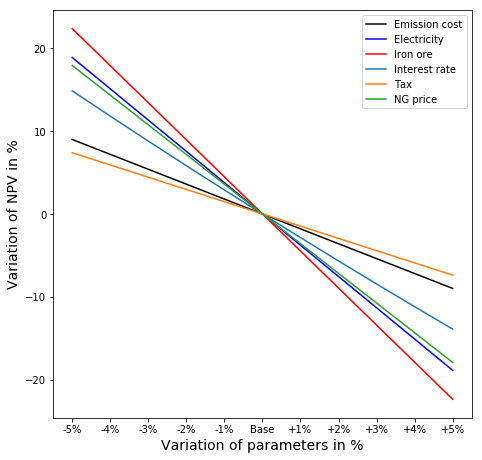

In [135]:
variations=['-5%','-4%','-3%','-2%','-1%','Base','+1%','+2%','+3%','+4%','+5%']
#NPV_base=[632.86,632.86,632.86,632.86,632.86,632.86,632.86,632.86,632.86]
#NPV_carbon=[557.27,576.17,595.06,613.96,632.86,651.76,670.65,689.55,708.45]
#NPV_emission=[699.54,682.87,666.20,649.53,632.86,616.19,599.52,582.84,566.17]
#NPV_electricity=[742.65,715.20,687.75,660.31,632.86,605,578,551,523]
#NPV_taxes=[1142.96,1015.44,887.91,760.38,632.86,505.33,378,250.28,123]
#NPV_interest=[1507.29,1265.52,1040.04,829.5,632.86,448.90,276.68,115.31,-36.62]
#NPV_emission_intensity=[761,729,697,665,632.86,601,569,537,505]
#NPV_steel=[-1204.35,-745.05,-285.75,173.56,632.86,1092.16,1551.46,2010.77,2470.07]
NPV_carbon_change=[]
NPV_emission_change=[]
NPV_electricity_change=[]
NPV_taxes_change=[]
NPV_interest_change=[]
NPV_ironore_change=[]
NPV_ng_change=[]
for i in range(len(NPV_base)):
    NPV_carbon_change.append(((NPV_carbon[i]-NPV_base[i])/NPV_base[i])*100)
    NPV_emission_change.append(((NPV_emission[i]-NPV_base[i])/NPV_base[i])*100)
    NPV_electricity_change.append(((NPV_electricity[i]-NPV_base[i])/NPV_base[i])*100)
    NPV_taxes_change.append(((NPV_tax_rate[i]-NPV_base[i])/NPV_base[i])*100)
    NPV_interest_change.append(((NPV_interest_rate[i]-NPV_base[i])/NPV_base[i])*100)
    NPV_ironore_change.append(((NPV_ironore[i]-NPV_base[i])/NPV_base[i])*100)
    NPV_ng_change.append(((NPV_natural_gas[i]-NPV_base[i])/NPV_base[i])*100)
    #NPV_emission_intensity_change.append(((NPV_emission_intensity[i]-NPV_base[i])/NPV_base[i])*100)
    #NPV_steel_change.append(((NPV_steel[i]-NPV_base[i])/NPV_base[i])*100)
plt.figure(figsize=(7.5,7.5))
#plt.plot(variations,NPV_carbon_change,color='Blue',label='NPV_carbon')
plt.plot(variations,NPV_emission_change,color='Black',label='Emission cost')
plt.plot(variations,NPV_electricity_change,color='Blue',label='Electricity')
plt.plot(variations,NPV_ironore_change,color='Red',label='Iron ore')
plt.plot(variations,NPV_interest_change,label='Interest rate')
plt.plot(variations,NPV_taxes_change,label='Tax')
plt.plot(variations,NPV_ng_change,label='NG price')
plt.ylabel('Variation of NPV in %',fontsize=14)
plt.xlabel('Variation of parameters in %',fontsize=14)
plt.legend()
plt.savefig('Sensitivity_analysis_npv.pdf',dpi=1200)

In [123]:
""""variations=['-20%','-15%','-10%','-5%','Base','+5%','+10%','+15%','+20%']
#IRR_base=[632.86,632.86,632.86,632.86,632.86,632.86,632.86,632.86,632.86]
#IRR_carbon=[557.27,576.17,595.06,613.96,632.86,651.76,670.65,689.55,708.45]
#IRR_emission=[699.54,682.87,666.20,649.53,632.86,616.19,599.52,582.84,566.17]
#IRR_electricity=[742.65,715.20,687.75,660.31,632.86,605,578,551,523]
#IRR_taxes=[1142.96,1015.44,887.91,760.38,632.86,505.33,378,250.28,123]
#IRR_interest=[1507.29,1265.52,1040.04,829.5,632.86,448.90,276.68,115.31,-36.62]
#IRR_emission_intensity=[761,729,697,665,632.86,601,569,537,505]
#IRR_steel=[-1204.35,-745.05,-285.75,173.56,632.86,1092.16,1551.46,2010.77,2470.07]
IRR_carbon_change=[]
IRR_emission_change=[]
IRR_electricity_change=[]
IRR_taxes_change=[]
IRR_interest_change=[]
IRR_ironore_change=[]
IRR_ng_change=[]
for i in range(len(IRR_base)):
    IRR_carbon_change.append(((IRR_carbon[i]-IRR_base[i])/IRR_base[i])*100)
    IRR_emission_change.append(((IRR_emission[i]-IRR_base[i])/IRR_base[i])*100)
    IRR_electricity_change.append(((IRR_electricity[i]-IRR_base[i])/IRR_base[i])*100)
    IRR_taxes_change.append(((IRR_tax_rate[i]-IRR_base[i])/IRR_base[i])*100)
    IRR_interest_change.append(((IRR_interest_rate[i]-IRR_base[i])/IRR_base[i])*100)
    IRR_ironore_change.append(((IRR_ironore[i]-IRR_base[i])/IRR_base[i])*100)
    #IRR_emission_intensity_change.append(((IRR_emission_intensity[i]-IRR_base[i])/IRR_base[i])*100)
    #IRR_steel_change.append(((IRR_steel[i]-IRR_base[i])/IRR_base[i])*100)
plt.figure(figsize=(7.5,7.5))
plt.plot(variations,IRR_carbon_change,color='Blue',label='IRR_carbon')
plt.plot(variations,IRR_emission_change,color='Green',label='IRR_emission')
plt.plot(variations,IRR_electricity_change,color='Black',label='IRR_electricity')
plt.plot(variations,IRR_ironore_change,color='red',label='IRR_iron_ore')
plt.plot(variations,IRR_interest_change,label='IRR_interest_rate')
plt.plot(variations,IRR_taxes_change,label='IRR_taxes')
plt.ylabel('Variation of IRR for Methane pyrolysis based HDRI-EAF system in %',fontsize=12)
plt.xlabel('Variation of parameters in %',fontsize=12)
plt.legend()
plt.savefig('Sensitivity_analysis.pdf',dpi=1200)"""

'"variations=[\'-20%\',\'-15%\',\'-10%\',\'-5%\',\'Base\',\'+5%\',\'+10%\',\'+15%\',\'+20%\']\n#IRR_base=[632.86,632.86,632.86,632.86,632.86,632.86,632.86,632.86,632.86]\n#IRR_carbon=[557.27,576.17,595.06,613.96,632.86,651.76,670.65,689.55,708.45]\n#IRR_emission=[699.54,682.87,666.20,649.53,632.86,616.19,599.52,582.84,566.17]\n#IRR_electricity=[742.65,715.20,687.75,660.31,632.86,605,578,551,523]\n#IRR_taxes=[1142.96,1015.44,887.91,760.38,632.86,505.33,378,250.28,123]\n#IRR_interest=[1507.29,1265.52,1040.04,829.5,632.86,448.90,276.68,115.31,-36.62]\n#IRR_emission_intensity=[761,729,697,665,632.86,601,569,537,505]\n#IRR_steel=[-1204.35,-745.05,-285.75,173.56,632.86,1092.16,1551.46,2010.77,2470.07]\nIRR_carbon_change=[]\nIRR_emission_change=[]\nIRR_electricity_change=[]\nIRR_taxes_change=[]\nIRR_interest_change=[]\nIRR_ironore_change=[]\nIRR_ng_change=[]\nfor i in range(len(IRR_base)):\n    IRR_carbon_change.append(((IRR_carbon[i]-IRR_base[i])/IRR_base[i])*100)\n    IRR_emission_change.ap

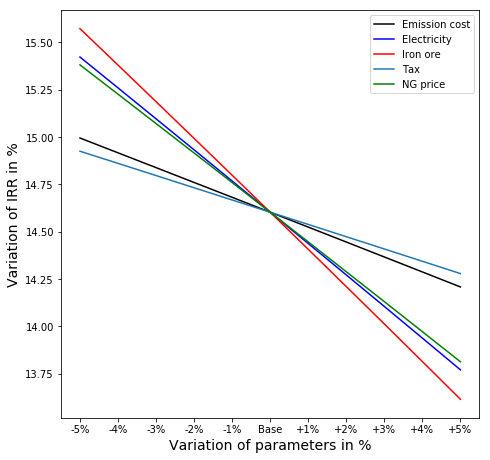

In [136]:
plt.figure(figsize=(7.5,7.5))
#plt.plot(variations,IRR_carbon ,color='Blue',label='IRR_carbon')
plt.plot(variations,IRR_emission ,color='Black',label='Emission cost')
plt.plot(variations,IRR_electricity ,color='Blue',label='Electricity')
plt.plot(variations,IRR_ironore,color='Red',label='Iron ore')
#plt.plot(variations,IRR_interest_rate,label='IRR_interest_rate')
plt.plot(variations,IRR_tax_rate ,label='Tax')
plt.plot(variations,IRR_ng ,color='green',label='NG price')
plt.ylabel('Variation of IRR in %',fontsize=14)
plt.xlabel('Variation of parameters in %',fontsize=14)
plt.legend()
plt.savefig('Sensitivity_analysis_irr.pdf',dpi=1200)

In [125]:
# https://onlinelibrary-wiley-com.ezproxy.uis.no/doi/epdf/10.1002/srin.201700248

# Scenario analysis 

In [126]:
"""# Base case business as usual
interest_rate=0.10
tax_rate=0.35
ca_base_price=200
ng_base_price=3
iron_ore_base_price=90
electricity_base_price=94.15
cer_base_price=50
carbon_steel_base_price=600
carbon_price=np.repeat(ca_base_price,plant_life).tolist()
ng_price=np.repeat(ng_base_price,plant_life).tolist() #USD/MMBTU
iron_ore_cost=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton
electricity_cost=np.repeat(electricity_base_price,plant_life).tolist()#USD/MWh
emission_cost=np.repeat(cer_base_price,plant_life).tolist() # USD 30 per ton 
carbon_steel_price=np.repeat(carbon_steel_base_price,plant_life).tolist()
cash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)

NPV_methane_pyrolysis=np.npv(interest_rate,cash_flow)
IRR_system=np.irr(cash_flow)*100
print(NPV_methane_pyrolysis)
print(IRR_system)"""

'# Base case business as usual\ninterest_rate=0.10\ntax_rate=0.35\nca_base_price=200\nng_base_price=3\niron_ore_base_price=90\nelectricity_base_price=94.15\ncer_base_price=50\ncarbon_steel_base_price=600\ncarbon_price=np.repeat(ca_base_price,plant_life).tolist()\nng_price=np.repeat(ng_base_price,plant_life).tolist() #USD/MMBTU\niron_ore_cost=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton\nelectricity_cost=np.repeat(electricity_base_price,plant_life).tolist()#USD/MWh\nemission_cost=np.repeat(cer_base_price,plant_life).tolist() # USD 30 per ton \ncarbon_steel_price=np.repeat(carbon_steel_base_price,plant_life).tolist()\ncash_flow=sensitivity_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)\n\nNPV_methane_pyrolysis=np.npv(interest_rate,cash_flow)\nIRR_system=np.irr(cash_flow)*100\nprint(NPV_methane_pyrolysis)\nprint(IRR_system)'

#### Carbon constrained world
#### It is assumed that in a climate constrained world, the emission cost would increase 
#### from 50 USD to 200 USD/ton linearly
#### The cost of electricity would reduce upto 45 USD/MWh linearly
#### The average cost of NG would decrease to 2 USD/MMBTU owing to lack of demand of NG
#### The price of carbon would reduce from 200 to 50 USD/ton linearly due to excess supply

In [108]:
"""
interest_rate_cc=0.10
tax_rate_cc=0.35
ca_base_price_cc=200
ng_base_price_cc=2
iron_ore_base_price_cc=90
electricity_base_price_cc=94.15
cer_base_price_cc=50
carbon_steel_base_price_cc=600"""


'\ninterest_rate_cc=0.10\ntax_rate_cc=0.35\nca_base_price_cc=200\nng_base_price_cc=2\niron_ore_base_price_cc=90\nelectricity_base_price_cc=94.15\ncer_base_price_cc=50\ncarbon_steel_base_price_cc=600'

In [109]:
"""carbon_price_cc=np.arange(200,0,-8).tolist()
ng_price_cc=np.repeat(ng_base_price_cc,plant_life).tolist() #USD/MMBTU
iron_ore_cost_cc=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton
electricity_cost_cc=np.arange(94.15,30,-2.6729166666).tolist()#USD/MWh
emission_cost_cc=np.arange(50,250,8).tolist() # USD 30 per ton 
carbon_steel_price_cc=np.repeat(carbon_steel_base_price,plant_life).tolist()
#print(len(electricity_cost_cc))
#print(len(carbon_price_cc))
#print(len(emission_cost_cc))
#electricity_cost_cc"""

'carbon_price_cc=np.arange(200,0,-8).tolist()\nng_price_cc=np.repeat(ng_base_price_cc,plant_life).tolist() #USD/MMBTU\niron_ore_cost_cc=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton\nelectricity_cost_cc=np.arange(94.15,30,-2.6729166666).tolist()#USD/MWh\nemission_cost_cc=np.arange(50,250,8).tolist() # USD 30 per ton \ncarbon_steel_price_cc=np.repeat(carbon_steel_base_price,plant_life).tolist()\n#print(len(electricity_cost_cc))\n#print(len(carbon_price_cc))\n#print(len(emission_cost_cc))\n#electricity_cost_cc'

In [110]:
"""cash_flow_cc=sensitivity_analysis(interest_rate_cc,tax_rate_cc,
                                  carbon_price_cc,ng_price_cc,iron_ore_cost_cc,
                                  electricity_cost_cc,emission_cost_cc,carbon_steel_price_cc)

NPV_methane_pyrolysis_cc=np.npv(interest_rate,cash_flow_cc)
IRR_system_cc=np.irr(cash_flow_cc)*100
print(NPV_methane_pyrolysis_cc)
print(IRR_system_cc)

"""

'cash_flow_cc=sensitivity_analysis(interest_rate_cc,tax_rate_cc,\n                                  carbon_price_cc,ng_price_cc,iron_ore_cost_cc,\n                                  electricity_cost_cc,emission_cost_cc,carbon_steel_price_cc)\n\nNPV_methane_pyrolysis_cc=np.npv(interest_rate,cash_flow_cc)\nIRR_system_cc=np.irr(cash_flow_cc)*100\nprint(NPV_methane_pyrolysis_cc)\nprint(IRR_system_cc)\n\n'

## Urgent climate action

#### The world sees the severe impact of climate change and within 5 years the price of emission increases to 200 USD/ton.
#### cost of electricity falls to 30 USD/MWh in the next 10 years and remains the same for the rest of the period. 
####  Price of carbon falls to zero in the next 10 years and additional cost of 100 is imposed to transport and store the carbon.
#### NG price falls to 1 USD/MMBTU in the next 10 yeas and remains the same for the next 15 years 

In [96]:

"""interest_rate_uc=0.10
tax_rate_uc=0.35
ca_base_price_uc=200
ng_base_price_uc=2
iron_ore_base_price_uc=90
electricity_base_price_uc=94.15
cer_base_price_uc=50
carbon_steel_base_price_uc=600"""

'interest_rate_uc=0.10\ntax_rate_uc=0.35\nca_base_price_uc=200\nng_base_price_uc=2\niron_ore_base_price_uc=90\nelectricity_base_price_uc=94.15\ncer_base_price_uc=50\ncarbon_steel_base_price_uc=600'

In [97]:
"""carbon_price_uc=np.arange(200,0,-8).tolist()
ng_price_uc=np.repeat(ng_base_price_uc,plant_life).tolist() #USD/MMBTU
iron_ore_cost_uc=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton
electricity_cost_uc=np.arange(94.15,30,-2.6729166666).tolist()#USD/MWh
emission_cost_uc=np.arange(50,250,8).tolist() # USD 30 per ton 
carbon_steel_price_uc=np.repeat(carbon_steel_base_price,plant_life).tolist()"""

'carbon_price_uc=np.arange(200,0,-8).tolist()\nng_price_uc=np.repeat(ng_base_price_uc,plant_life).tolist() #USD/MMBTU\niron_ore_cost_uc=np.repeat(iron_ore_base_price,plant_life).tolist() #usd/ton\nelectricity_cost_uc=np.arange(94.15,30,-2.6729166666).tolist()#USD/MWh\nemission_cost_uc=np.arange(50,250,8).tolist() # USD 30 per ton \ncarbon_steel_price_uc=np.repeat(carbon_steel_base_price,plant_life).tolist()'

In [98]:
def npv_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price):
    #capital cost
    #reactor cost calculation
    plant_life=25
    m1=1.599
    #interest_rate=0.10
    #tax_rate=0.35
    steel_density=7700 #kg/m3
    refractory_density=2970 #kg/m3
    steel_cost=500 #USD/ton
    refractory_cost=400 #USD/ton
    tank_manufacturing=100 #USD/ton
    refractory_labour=50 #USD/ton
    vol_steel_reactor=(np.pi*((dia_reac/2+0.045)**2-(dia_reac/2)**2)*len_reac)
    vol_refractory=(np.pi*((dia_reac/2+0.4)**2-(dia_reac/2)**2)*len_reac)
    weight_steel_reactor=((vol_steel_reactor*steel_density)/1000)
    weight_refractory=((vol_refractory*refractory_density)/1000)
    reactor_cost=((weight_steel_reactor*steel_cost)+(weight_refractory*refractory_cost)+(weight_steel_reactor*100)+(weight_refractory*50))/10**6+(tin_cost_million)
    EAF_cost_per_ton_yr=112
    # The value includes installation costs 
    #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
    EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
    #### DRI Cost 
    #Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

    DRI_cost_per_ton_yr=275 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
    # A reduction in cost is considered as larger plants have smaller costs. (0.6)
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
    #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
    DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 

    PSA_cost=5 # Million USD 
   
    

    #### Gas fired metal furnace 
    #https://www.alibaba.com/showroom/gas-melting-furnace.html

    el_heater_cost=50 #Million USD 
    lang_factor_reac=10
    total_capital_cost=((reactor_cost+PSA_cost)*lang_factor_reac)+(EAF_total_cost+DRI_total_cost+ el_heater_cost)
     ##Operational cost
    eaf_op_cost_tls=np.repeat(32,plant_life).tolist() #t/yr of dri
    dri_op_cost_tls=np.repeat(13,plant_life).tolist() #t/yr of dri
    dri_elec=284.0006036823013 #KWh
    EL4=445.3464
    el_heat_reac=1.4337274146203023 #MWh
    el_total=(dri_elec+EL4+(el_heat_reac*1000))/1000
    ng_cost=[]
    iron_ore_cost_tls=[]
    electricity_cost_tls=[]
    for i in range(len(eaf_op_cost_tls)):
        ng_cost.append(total_ng_req_tls_MMBTU*ng_price)
        iron_ore_cost_tls.append(m1*iron_ore_cost)
        electricity_cost_tls.append((electricity_cost*(el_total)))
    operational_cost_annual=[]
    for i in range(len(eaf_op_cost_tls)):
        operational_cost_annual.append((((ng_cost[i]+iron_ore_cost_tls[i]+electricity_cost_tls[i]+eaf_op_cost_tls[i]+dri_op_cost_tls[i])*steel_prod_yr)/10**6))
    
    #Maintenance cost
    maintenance_cost_percentage=0.10 # 10% of the capital cost
    maint_cost_yr=np.repeat((maintenance_cost_percentage*total_capital_cost),plant_life)
    maint_cost_yr= maint_cost_yr.tolist()
    #labour cost
    labour_cost_tls=40 #USD/tls
    labour_cost_yr=np.repeat(((labour_cost_tls*steel_prod_yr)/10**6),plant_life)
    labour_cost_yr=labour_cost_yr.tolist()
    #Emission cost
    total_emission_cost=[]
    for i in range(len(eaf_op_cost_tls)):
        total_emission_cost.append(annual_emission_mtco2[i]*emission_cost) # in Million USD
    depreciation=(total_capital_cost-0)/plant_life
    depreciation_cost=[]
    for i in range(len(labour_cost_yr)):
        if(i<2):
            depreciation_cost.append(0)
        else:
            depreciation_cost.append(depreciation)
    
        # Revenue
    # USD/ton
    revenue_steel=[]
    for i in range(len(eaf_op_cost_tls)):
        revenue_steel.append(((carbon_steel_price*steel_prod_yr)/10**6))
    #USD/ton
    # Assume that 60% of the carbon produced could be sold
    carbon_sold=0.6
    revenue_carbon=[]
    # Revenue generated in Million USD /year 
    for i in range(len(eaf_op_cost_tls)):
        revenue_carbon.append((carbon_price*carbon_prod_yr*carbon_sold)/10**9)
    total_revenue_usd_million=[]
    for i in range(len(revenue_carbon)):
        total_revenue_usd_million.append(revenue_steel[i]+revenue_carbon[i])
    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()
    annual_emission=annual_emission_mtco2
    for i in range(2):
        production_steel[i]=0
        production_hydrogen[i]=0
        annual_emission[i]=0
    # Converting revenue
    revenue=total_revenue_usd_million
    revenue_c=revenue_carbon
    revenue_s=revenue_steel

    
    for i in range(2):
        revenue_c[i]=0
        revenue_s[i]=0
        revenue[i]=0
    capital_cost=np.repeat(0,plant_life).tolist()
    capital_cost[0]=(total_capital_cost/3)
    capital_cost[1]=(total_capital_cost)*(2/3)
    operational_cost=operational_cost_annual
    labour_cost=labour_cost_yr
    maintenance_cost=maint_cost_yr
    #emission_cost=total_emission_cost

    for i in range(2):
        operational_cost[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        total_emission_cost[i]=0 
    # tax calculation
    tax_cost=[]
    for i in range(len(labour_cost_yr)):
        tax_cost.append((revenue[i]-(operational_cost[i]+labour_cost[i]+maintenance_cost[i]+total_emission_cost[i]+depreciation_cost[i]))*tax_rate)
    cash_flow=[]
    for i in range(len(revenue)):
        cash_flow.append(revenue[i]-(capital_cost[i]+operational_cost[i]+labour_cost[i]+maintenance_cost[i]+total_emission_cost[i]+tax_cost[i]))
    NPV_methane_pyrolysis=np.npv(interest_rate,cash_flow)
    IRR=np.irr(cash_flow)
    return(None,NPV_methane_pyrolysis)
    

    


   


    

In [99]:
interest_rate=0.10
tax_rate=0.35
ca_base_price=200
ng_base_price=2
iron_ore_base_price=90
electricity_base_price=94.15
cer_base_price=50
carbon_steel_base_price=600

In [100]:
p=npv_analysis(interest_rate,tax_rate,carbon_price,ng_price,iron_ore_cost,electricity_cost,emission_cost,carbon_steel_price)
print(p)

(None, 97.62036980726293)


In [101]:
import uncertainpy as un
import chaospy as cp                       # To create distributions
import numpy as np 

In [102]:
model = un.Model(run=npv_analysis)


In [103]:
# Create the distributions
interest_dist = cp.Uniform(0.10, 0.20)
tax_rate_dist = cp.Uniform(30,35)
carbon_price_dist=cp.Uniform(50,200)
ng_price_dist=cp.Uniform(2,6)
iron_ore_cost_dist=cp.Uniform(80,100)
electricity_cost_dist=cp.Uniform(45,94.15)
emission_cost_dist=cp.Uniform(50,100)
carbon_steel_price_dist=cp.Uniform(600,650)
# Define the parameter dictionary
parameters = {"interest_rate": interest_dist, "tax_rate":tax_rate_dist, "carbon_price":carbon_price_dist,"ng_price":ng_price_dist,
             "iron_ore_cost":iron_ore_cost_dist,"electricity_cost":electricity_cost_dist,"emission_cost":emission_cost_dist,
            "carbon_steel_price":carbon_steel_price_dist}

In [104]:
# Set up the uncertainty quantification
UQ = un.UncertaintyQuantification(model=model, parameters=parameters)
# Perform the uncertainty quantification using
# polynomial chaos with point collocation (by default)
# We set the seed to easier be able to reproduce the result
data = UQ.quantify( method="mc",
    pc_method="collocation",
    rosenblatt=True,seed=10)

Running model: 100%|██████████| 50000/50000 [01:39<00:00, 504.18it/s]


Saving data as: data/npv_analysis.h5


In [105]:
print(data)

|   Information   |

uncertain_parameters: ['interest_rate', 'tax_rate', 'carbon_price', 'ng_price', 'iron_ore_cost', 'electricity_cost', 'emission_cost', 'carbon_steel_price']
model_name: npv_analysis
incomplete: []
method: monte carlo method. nr_samples=10000
version: 1.2.1
seed: 10
model_ignore: False
error: []

|   npv_analysis   |

=== labels ===
[]

=== evaluations ===
[-16983.78698039374, -14093.77940837332, -16908.68188516379, -12296.838111213163, -31856.376082380113, -18900.216257377604, -44974.52050975399, -13881.98150149893, -3672.3850267488433, -33335.897554832685, -15256.891624130807, -24794.019279933356, -15195.310641078911, -19984.380278668865, 480.0304918144706, -16736.64061662698, 4420.3658425828, -12861.867926967565, -24397.32537861818, 12652.8501821436, -13278.513452554107, -20515.461490236798, -14232.812767261305, -13738.472494399732, -22808.44062428473, -14506.506192364945, -14081.602557454675, -1114.7215071380172, -12806.397399048295, -20979.628475244266, -9865.15

In [106]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [107]:
problem = {
    'num_vars': 8,
    'names': ['interest_rate','tax_rate','carbon_price','ng_price','iron_ore_cost','electricity_cost','emission_cost','carbon_steel_price'],
    'bounds': [[0.10, 0.2],
               [0.25, 0.35],
               [50, 200],[2,6],[80,100],[45,94],[50,100],[600,650]
              ]
}

In [108]:
param_values = saltelli.sample(problem, 1000)

In [109]:
param_values

array([[1.21972656e-01, 2.59667969e-01, 1.27783203e+02, ...,
        8.94541016e+01, 5.22949219e+01, 6.44970703e+02],
       [1.50097656e-01, 2.59667969e-01, 1.27783203e+02, ...,
        8.94541016e+01, 5.22949219e+01, 6.44970703e+02],
       [1.21972656e-01, 2.56933594e-01, 1.27783203e+02, ...,
        8.94541016e+01, 5.22949219e+01, 6.44970703e+02],
       ...,
       [1.43017578e-01, 2.83642578e-01, 5.21240234e+01, ...,
        7.73237305e+01, 6.76025391e+01, 6.36254883e+02],
       [1.43017578e-01, 2.83642578e-01, 5.21240234e+01, ...,
        7.73237305e+01, 9.24072266e+01, 6.24243164e+02],
       [1.43017578e-01, 2.83642578e-01, 5.21240234e+01, ...,
        7.73237305e+01, 9.24072266e+01, 6.36254883e+02]])

In [110]:
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = npv_analysis(X)

TypeError: npv_analysis() missing 7 required positional arguments: 'tax_rate', 'carbon_price', 'ng_price', 'iron_ore_cost', 'electricity_cost', 'emission_cost', and 'carbon_steel_price'

In [ ]:
NPV_94=[-458.2909148363127,
 1454.413398266894,
 1843.4762222366012,
 1860.4565206116745,
 1695.1340943102166,
 -222.93812385770912,
 -154.43625058723788,
 -14.157230570279598,
 194.41373268892409,
 256.63196390392307]

In [ ]:
IRR_94=[7.607518290889925,
 22.78786902182275,
 29.102613348886265,
 28.57722677677923,
 24.625006283515603,
 8.908821424855407,
 7.960831674233382,
 9.819440646297227,
 12.345913595626289,
 12.842897610665371]

In [ ]:
IRR_60=[9.696110099961231,
 25.807804038421843,
 32.46641931192935,
 31.821992415947076,
 27.447769856771863,
 10.670041066551384,
 20.334662573511686,
 21.50840731471424,
 23.024033338025696,
 22.422354630310394]

In [ ]:
NPV_60=[-60.25284314900094,
 1835.291253452562,
 2207.0697913144722,
 2224.0500896895455,
 2058.727663388088,
 140.65544522016035,
 908.9007428446213,
 1026.2584408439864,
 1197.8110804783792,
 1231.0551214546845]

In [ ]:
Configurations=['1','2','3','4','5','6','7','8','9','10']

In [ ]:
plt.bar(Configurations,NPV_94,label='Electricity price=94.15')
plt.bar(Configurations,NPV_60,label='Electricity price=60')
plt.legend()